In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/BTech_Final_Project/train_data.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               20000 non-null  object 
 1   memory_GB            20000 non-null  float64
 2   network_log10_MBps   20000 non-null  float64
 3   local_IO_log10_MBps  20000 non-null  float64
 4   NFS_IO_log10_MBps    20000 non-null  float64
 5   failed               20000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
print(train_df.shape)

(20000, 6)


In [ ]:
print(train_df)

             job_id  memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0      jobID1634295    44.3904             -1.0262               0.8033   
1      jobID2033452    31.5839             -1.4608              -0.6080   
2      jobID2068800   154.4610             -0.5508              -0.3637   
3        jobID78826    71.8570              3.5701              -0.1281   
4      jobID2935014    30.0370              3.3094              -0.9463   
...             ...        ...                 ...                  ...   
19995  jobID3638409    62.2909             -1.3317               0.8725   
19996  jobID1716406    19.8377              3.1328              -0.2947   
19997   jobID360445    22.1773              3.5185              -0.4147   
19998   jobID335571    14.8184              2.7831              -1.0320   
19999  jobID1165709     7.9835              0.7225              -1.1583   

       NFS_IO_log10_MBps  failed  
0                -3.0000       0  
1                -2.9967     

In [ ]:
X = train_df.iloc[:, 1:5]
y = train_df.iloc[:,5]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE()

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X,y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
print(oversampled)
print(oversampled.shape)

       failed   memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0           0   44.390400           -1.026200             0.803300   
1           0   31.583900           -1.460800            -0.608000   
2           0  154.461000           -0.550800            -0.363700   
3           0   71.857000            3.570100            -0.128100   
4           0   30.037000            3.309400            -0.946300   
...       ...         ...                 ...                  ...   
36743       1   55.905274            3.142060            -0.530779   
36744       1   14.757233            2.969491            -0.476722   
36745       1   12.511933            1.986379             0.956373   
36746       1   28.215135           -1.719484            -0.435362   
36747       1   15.310204           -0.333888             0.700745   

       NFS_IO_log10_MBps  
0              -3.000000  
1              -2.996700  
2              -3.000000  
3               2.304000  
4              -3.000000

<Axes: xlabel='failed', ylabel='count'>

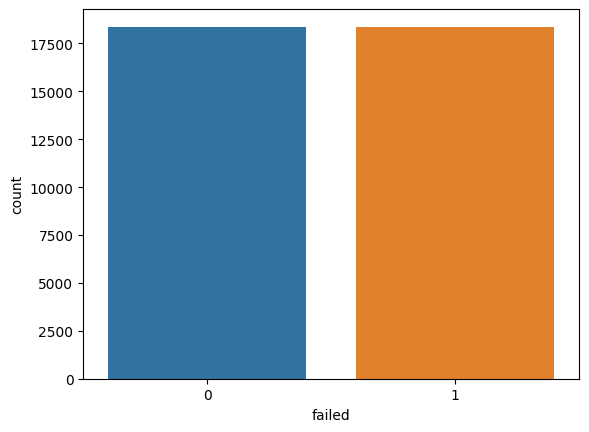

In [ ]:
import seaborn as sns
sns.countplot(x='failed',data=oversampled)

Reshape X_train and X_test to 3D since Conv1D requires 3D data

In [ ]:
X = oversampled.iloc[:, 1:5]
y = oversampled.iloc[:,0]
print(X)
print(y)

        memory_GB  network_log10_MBps  local_IO_log10_MBps  NFS_IO_log10_MBps
0       44.390400           -1.026200             0.803300          -3.000000
1       31.583900           -1.460800            -0.608000          -2.996700
2      154.461000           -0.550800            -0.363700          -3.000000
3       71.857000            3.570100            -0.128100           2.304000
4       30.037000            3.309400            -0.946300          -3.000000
...           ...                 ...                  ...                ...
36743   55.905274            3.142060            -0.530779           1.608983
36744   14.757233            2.969491            -0.476722          -3.000000
36745   12.511933            1.986379             0.956373           2.178951
36746   28.215135           -1.719484            -0.435362          -3.000000
36747   15.310204           -0.333888             0.700745          -3.000000

[36748 rows x 4 columns]
0        0
1        0
2        0
3    

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(27561, 4, 1)
(9187, 4, 1)


Convert the Target label to categorical

In [ ]:
target_train = y_train
target_test = y_test
Y_train=to_categorical(target_train)
Y_test=to_categorical(target_test)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(27561, 2)
(9187, 2)


Performance Evaluation Function

In [ ]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted')
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)

Model Defination

In [ ]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():

    cnnmodel = Sequential()
    #cnnmodel.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    #cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3, 128)            384       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
2/2 [==============================] - 13s 1s/step - loss: 0.9780 - accuracy: 0.5625 - val_loss: 0.6880 - val_accuracy: 0.4905
Epoch 2/20
2/2 [==============================] - 1s 659ms/step - loss: 0.7374 - accuracy: 0.5000 - val_loss: 0.8230 - val_accuracy: 0.5108
Epoch 3/20
2/2 [==============================] - 1s 549ms/step - loss: 0.7504 - accuracy: 0.5156 - val_loss: 0.8359 - val_accuracy: 0.5108
Epoch 4/20
2/2 [==============================] - 1s 525ms/step - loss: 0.7528 - accuracy: 0.4062 - val_loss: 0.7758 - val_accuracy: 0.5108
Epoch 5/20
2/2 [==============================] - 1s 499ms/step - loss: 0.7047 - accuracy: 0.5312 - val_loss: 0.7432 - val_accuracy: 0.5108
Epoch 6/20
2/2 [==============================] - 1s 668ms/step - loss: 0.8164 - accuracy: 0.5312 - val_loss: 0.7234 - val_accuracy: 0.5108
Epoch 7/20
2/2 [==============================] - 0s 350ms/step - loss: 0.7699 - accuracy: 0.5156 - val_loss: 0.6954 - val_accuracy: 0.4475
Epoch 8/20
2/2 [======

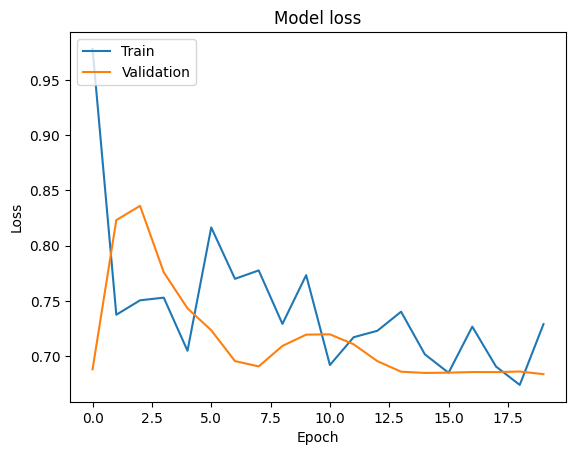

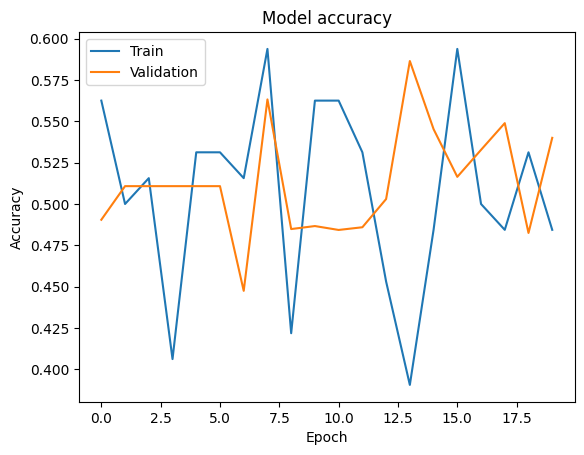

In [ ]:
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

Test the Model

In [ ]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)

288/288 [==============================] - 1s 2ms/step


Evaluate the Performance

In [ ]:
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)
showResults(cnn_actual_value, cnn_predict)

Accuracy  : 0.5345597039294655
Precision : 0.540560145879584
f1Score : 0.5167538506332421
[[3337 1256]
 [3020 1574]]


In [ ]:
cnn = accuracy_score(cnn_actual_value, cnn_predict)
f1cnn=f1_score(cnn_actual_value, cnn_predict, average='weighted')

# KFold VAlidation

In [ ]:
tempX=oversampled.iloc[:,1:5].values
tempY=oversampled.iloc[:,0].values
skf = StratifiedKFold(n_splits=3, shuffle=True)
skf.get_n_splits(X_train, target_train)
foldNum=0
for train_index, val_index in skf.split(X_train, target_train):
    foldNum+=1
    print("Results for fold",foldNum)
    X_traincv, X_valcv = tempX[train_index], tempX[val_index]
    Y_traincv, Y_valcv = tempY[train_index], tempY[val_index]

    X_traincv=X_traincv.reshape(X_traincv.shape[0],X_traincv.shape[1],1)
    X_valcv=X_valcv.reshape(X_valcv.shape[0],X_valcv.shape[1],1)
    # one hot encode
    Y_traincv = to_categorical(Y_traincv)
    Y_valcv = to_categorical(Y_valcv)

    history = cnnmodel.fit(X_traincv, Y_traincv, validation_data = (X_valcv, Y_valcv), epochs=20,steps_per_epoch=2, batch_size=batch_size)
    yPredict = cnnmodel.predict(X_valcv)

    #Converting one hot encoded test label to label
    pred = np.argmax(yPredict, axis=1)
    val = np.argmax(Y_valcv, axis=1)

    showResults(val, pred)

Results for fold 1
Epoch 1/20
2/2 [==============================] - 1s 928ms/step - loss: 0.6653 - accuracy: 0.5469 - val_loss: 0.6613 - val_accuracy: 0.6025
Epoch 2/20
2/2 [==============================] - 1s 873ms/step - loss: 0.6328 - accuracy: 0.7031 - val_loss: 0.6525 - val_accuracy: 0.6642
Epoch 3/20
2/2 [==============================] - 1s 1s/step - loss: 0.5723 - accuracy: 0.7656 - val_loss: 0.6464 - val_accuracy: 0.6654
Epoch 4/20
2/2 [==============================] - 1s 566ms/step - loss: 0.6537 - accuracy: 0.6094 - val_loss: 0.6437 - val_accuracy: 0.6654
Epoch 5/20
2/2 [==============================] - 1s 649ms/step - loss: 0.7606 - accuracy: 0.6094 - val_loss: 0.6428 - val_accuracy: 0.6654
Epoch 6/20
2/2 [==============================] - 1s 649ms/step - loss: 0.6395 - accuracy: 0.7188 - val_loss: 0.6427 - val_accuracy: 0.6654
Epoch 7/20
2/2 [==============================] - 1s 573ms/step - loss: 0.6343 - accuracy: 0.5781 - val_loss: 0.6432 - val_accuracy: 0.6654
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 1s 1s/step - loss: 0.6134 - accuracy: 0.7500 - val_loss: 0.6338 - val_accuracy: 0.6711
Epoch 2/20
2/2 [==============================] - 1s 648ms/step - loss: 0.6114 - accuracy: 0.6562 - val_loss: 0.6330 - val_accuracy: 0.6711
Epoch 3/20
2/2 [==============================] - 1s 573ms/step - loss: 0.6630 - accuracy: 0.6094 - val_loss: 0.6319 - val_accuracy: 0.6711
Epoch 4/20
2/2 [==============================] - 1s 649ms/step - loss: 0.6303 - accuracy: 0.6875 - val_loss: 0.6309 - val_accuracy: 0.6711
Epoch 5/20
2/2 [==============================] - 1s 551ms/step - loss: 0.6902 - accuracy: 0.6875 - val_loss: 0.6297 - val_accuracy: 0.6711
Epoch 6/20
2/2 [==============================] - 1s 649ms/step - loss: 0.6531 - accuracy: 0.6250 - val_loss: 0.6286 - val_accuracy: 0.6711
Epoch 7/20
2/2 [==============================] - 1s 575ms/step - loss: 0.6451 - accuracy: 0.6719 - val_loss: 0.6276 - val_accuracy: 0.6711
Epoch 8/20
2/2 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 1s 679ms/step - loss: 0.5949 - accuracy: 0.6875 - val_loss: 0.6254 - val_accuracy: 0.6635
Epoch 2/20
2/2 [==============================] - 1s 555ms/step - loss: 0.6777 - accuracy: 0.6719 - val_loss: 0.6242 - val_accuracy: 0.6635
Epoch 3/20
2/2 [==============================] - 1s 647ms/step - loss: 0.5683 - accuracy: 0.7344 - val_loss: 0.6229 - val_accuracy: 0.6635
Epoch 4/20
2/2 [==============================] - 1s 590ms/step - loss: 0.6153 - accuracy: 0.7188 - val_loss: 0.6220 - val_accuracy: 0.6635
Epoch 5/20
2/2 [==============================] - 1s 1s/step - loss: 0.6687 - accuracy: 0.6562 - val_loss: 0.6212 - val_accuracy: 0.6635
Epoch 6/20
2/2 [==============================] - 1s 893ms/step - loss: 0.6161 - accuracy: 0.6875 - val_loss: 0.6203 - val_accuracy: 0.6635
Epoch 7/20
2/2 [==============================] - 1s 1s/step - loss: 0.5825 - accuracy: 0.7344 - val_loss: 0.6192 - val_accuracy: 0.6635
Epoch 8/20
2/2 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test the Model

In [ ]:
cnnpredictionscv = cnnmodel.predict(X_test, verbose=1)

288/288 [==============================] - 0s 2ms/step


Evaluate the Performance

In [ ]:
cnn_predictcv=np.argmax(cnnpredictionscv,axis=1)
cnn_actual_valuecv=np.argmax(Y_test,axis=1)
showResults(cnn_actual_valuecv, cnn_predictcv)

Accuracy  : 0.4999455752694024
Precision : 0.24994557823145372
f1Score : 0.33327286316580046
[[4593    0]
 [4594    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnnkv = accuracy_score(cnn_actual_valuecv, cnn_predictcv)
f1cnnkv=f1_score(cnn_actual_valuecv, cnn_predictcv, average='weighted')

# **Hybrid CNN LSTM**

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 2, 128)            82432     
                                                                 
 flatten (Flatten)           (None, 256)               0

In [ ]:
history = model.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
2/2 [==============================] - 6s 2s/step - loss: 0.6660 - acc: 0.5469 - val_loss: 0.6811 - val_acc: 0.4901
Epoch 2/20
2/2 [==============================] - 0s 453ms/step - loss: 0.6756 - acc: 0.4375 - val_loss: 0.6562 - val_acc: 0.4898
Epoch 3/20
2/2 [==============================] - 0s 435ms/step - loss: 0.6301 - acc: 0.5469 - val_loss: 0.6251 - val_acc: 0.4901
Epoch 4/20
2/2 [==============================] - 1s 650ms/step - loss: 0.6183 - acc: 0.6250 - val_loss: 0.5929 - val_acc: 0.4892
Epoch 5/20
2/2 [==============================] - 1s 651ms/step - loss: 0.6118 - acc: 0.4688 - val_loss: 0.5612 - val_acc: 0.4892
Epoch 6/20
2/2 [==============================] - 1s 649ms/step - loss: 0.5465 - acc: 0.5625 - val_loss: 0.5326 - val_acc: 0.4892
Epoch 7/20
2/2 [==============================] - 1s 650ms/step - loss: 0.5275 - acc: 0.4844 - val_loss: 0.5067 - val_acc: 0.4892
Epoch 8/20
2/2 [==============================] - 0s 434ms/step - loss: 0.5388 - acc: 0.4375 

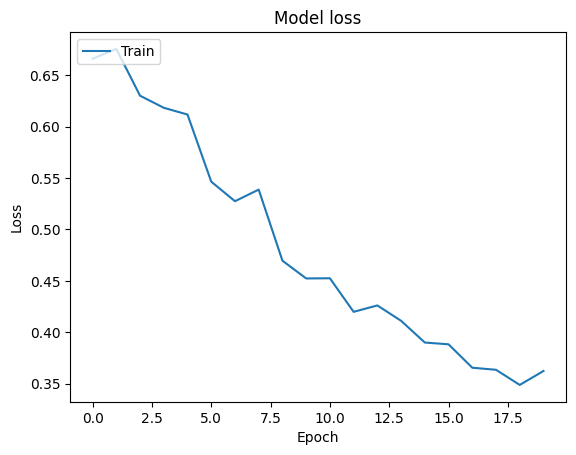

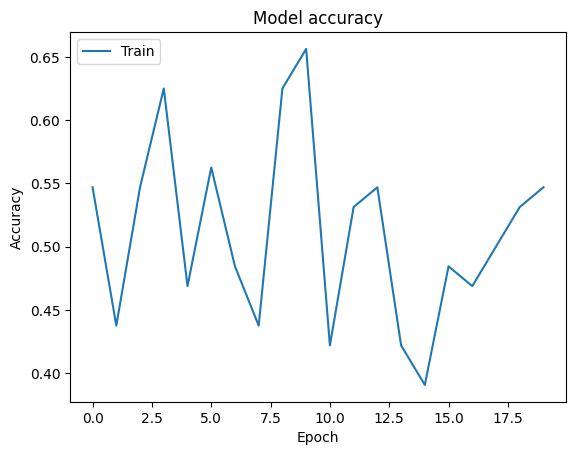

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

288/288 [==============================] - 1s 3ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.5328181125503428
Precision : 0.5506971411185485
f1Score : 0.48754884775590945
[[1082 3511]
 [ 781 3813]]


In [ ]:
hyd = accuracy_score(actual_valuecv, predictcv)
f1hyd=f1_score(actual_valuecv, predictcv, average='weighted')

# LSTM

In [ ]:
from keras.callbacks import EarlyStopping
import math
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 13)                780       
                                                                 
 dense_10 (Dense)            (None, 2)                 28        
                                                                 
 activation_4 (Activation)   (None, 2)                 0         
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2549 - acc: 0.4493
Epoch 2/10
862/862 [==============================] - 4s 4ms/step - loss: 0.2532 - acc: 0.4592
Epoch 3/10
862/862 [==============================] - 3s 4ms/step - loss: 0.2523 - acc: 0.4637
Epoch 4/10
862/862 [==============================] - 3s 4ms/step - loss: 0.2518 - acc: 0.4634
Epoch 5/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2515 - acc: 0.4554
Epoch 6/10
862/862 [==============================] - 4s 4ms/step - loss: 0.2512 - acc: 0.4579
Epoch 7/10
862/862 [==============================] - 4s 4ms/step - loss: 0.2510 - acc: 0.4550
Epoch 8/10
862/862 [==============================] - 4s 4ms/step - loss: 0.2508 - acc: 0.4744
Epoch 9/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2506 - acc: 0.5642
Epoch 10/10
862/862 [==============================] - 3s 4ms/step - loss: 0.2504 - acc: 0.5551


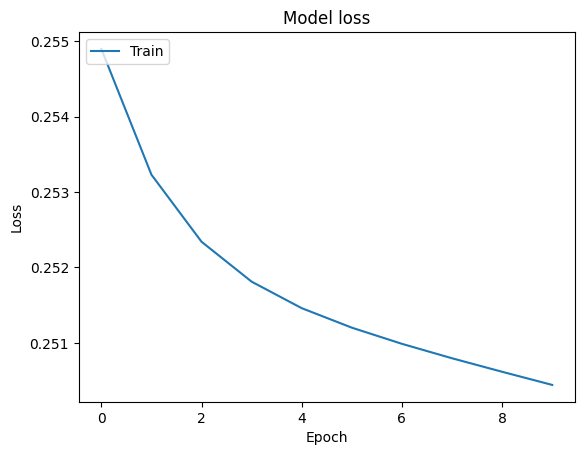

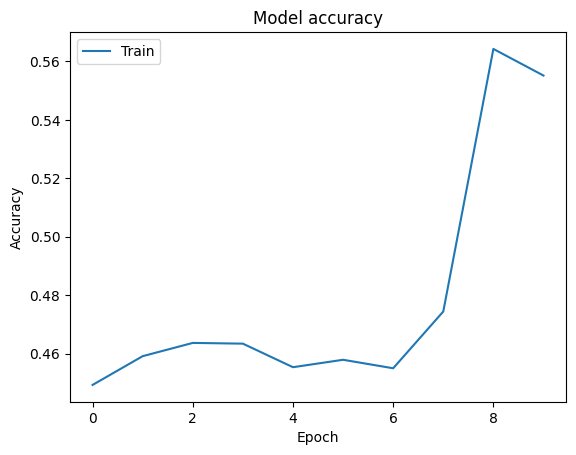

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

288/288 [==============================] - 1s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.5625340154566235
Precision : 0.5626716304284504
f1Score : 0.5622886814828326
[[2475 2118]
 [1901 2693]]


In [ ]:
lstm = accuracy_score(actual_valuecv, predictcv)
f1lstm=f1_score(actual_valuecv, predictcv, average='weighted')

# BiLSTM

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(Bidirectional(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
862/862 [==============================] - 9s 6ms/step - loss: 0.2514 - acc: 0.5039
Epoch 2/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2494 - acc: 0.5321
Epoch 3/10
862/862 [==============================] - 5s 6ms/step - loss: 0.2485 - acc: 0.5599
Epoch 4/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2480 - acc: 0.5844
Epoch 5/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2477 - acc: 0.5898
Epoch 6/10
862/862 [==============================] - 6s 6ms/step - loss: 0.2474 - acc: 0.6086
Epoch 7/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2472 - acc: 0.6147
Epoch 8/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2469 - acc: 0.6206
Epoch 9/10
862/862 [==============================] - 5s 6ms/step - loss: 0.2467 - acc: 0.6208
Epoch 10/10
862/862 [==============================] - 4s 5ms/step - loss: 0.2465 - acc: 0.6187


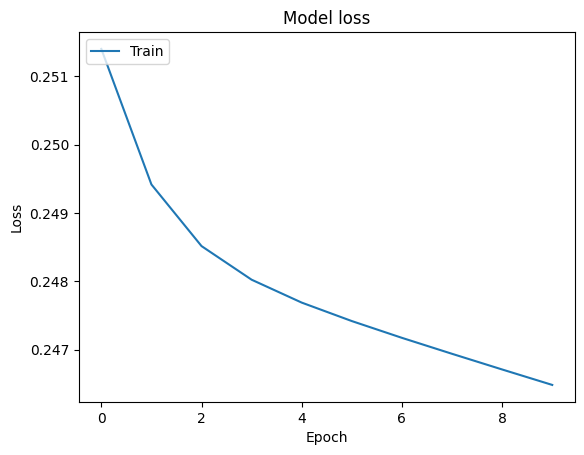

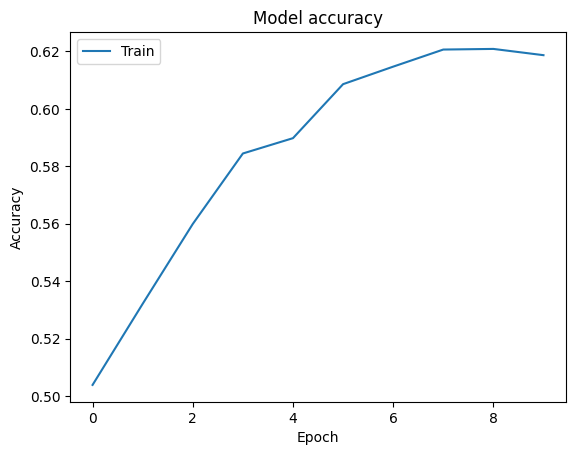

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

288/288 [==============================] - 1s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.6230543158811364
Precision : 0.6381767470091799
f1Score : 0.6124670721495562
[[3621  972]
 [2491 2103]]


In [ ]:
bilstm = accuracy_score(actual_valuecv, predictcv)
f1bilstm=f1_score(actual_valuecv, predictcv, average='weighted')

# RNN

In [ ]:
from keras.layers import Dense, Dropout, Embedding, SimpleRNN

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(SimpleRNN(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 13)                195       
                                                                 
 dense_5 (Dense)             (None, 2)                 28        
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
862/862 [==============================] - 6s 5ms/step - loss: 0.2539 - acc: 0.5415
Epoch 2/10
862/862 [==============================] - 6s 7ms/step - loss: 0.2394 - acc: 0.5578
Epoch 3/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2347 - acc: 0.5892
Epoch 4/10
862/862 [==============================] - 5s 6ms/step - loss: 0.2319 - acc: 0.5994
Epoch 5/10
862/862 [==============================] - 6s 7ms/step - loss: 0.2297 - acc: 0.6057
Epoch 6/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2278 - acc: 0.6140
Epoch 7/10
862/862 [==============================] - 6s 7ms/step - loss: 0.2260 - acc: 0.6263
Epoch 8/10
862/862 [==============================] - 5s 5ms/step - loss: 0.2242 - acc: 0.6335
Epoch 9/10
862/862 [==============================] - 5s 6ms/step - loss: 0.2227 - acc: 0.6399
Epoch 10/10
862/862 [==============================] - 6s 7ms/step - loss: 0.2214 - acc: 0.6445


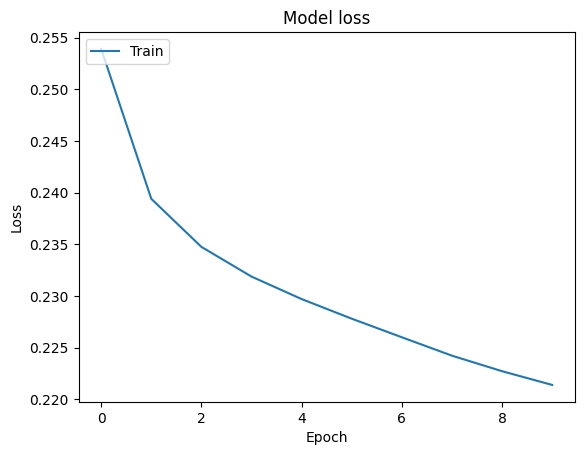

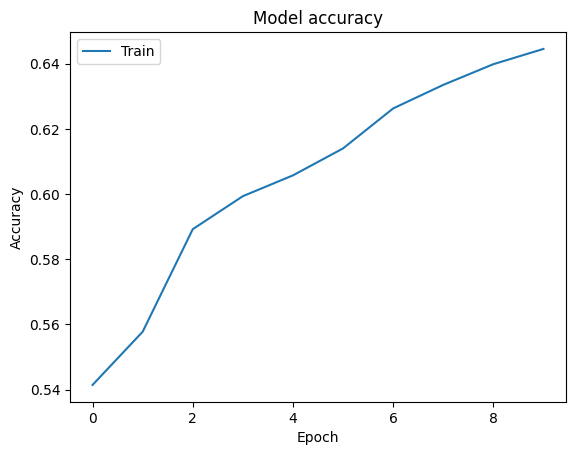

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

288/288 [==============================] - 1s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.6492870360291717
Precision : 0.6492891788157724
f1Score : 0.649285614903939
[[2973 1620]
 [1602 2992]]


In [ ]:
rnn = accuracy_score(actual_valuecv, predictcv)
f1rnn=f1_score(actual_valuecv, predictcv, average='weighted')

In [ ]:
importance_scores=model.layers[0].get_weights()[0]
for i , feature in enumerate(X_train.columns.values):
  print(f"{feature}:{importance_scores[0,i]}")

memory_GB:-0.4168887138366699
network_log10_MBps:0.08596696704626083
local_IO_log10_MBps:0.06113975867629051
NFS_IO_log10_MBps:0.06684833019971848


# For Machine Learning

In [ ]:
X = oversampled.iloc[:, 1:5]
y = oversampled.iloc[:,0]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict((X_test))
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)
val1 = accuracy_score(actual_valuecv, predictcv) *100
f1rf = f1_score(actual_valuecv, predictcv, average='weighted')

Accuracy  : 0.9307717426798737
Precision : 0.9308605828945998
f1Score : 0.9307681154272458
[[4242  351]
 [ 285 4309]]


In [ ]:
sort = RF.feature_importances_.argsort()

Text(0.5, 0, 'Feature Importance')

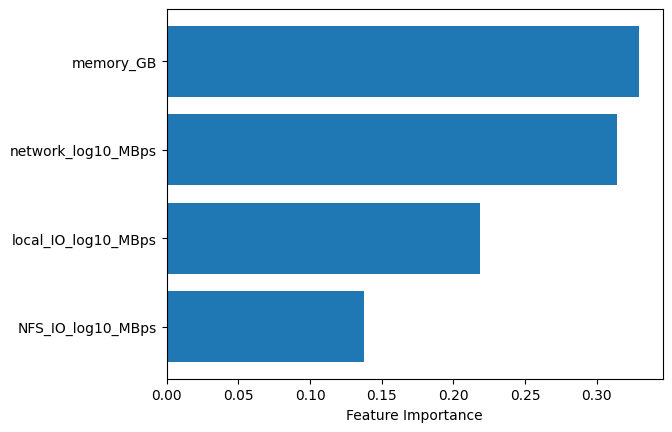

In [ ]:
plt.barh(X_train.columns.values[sort], RF.feature_importances_[sort])
plt.xlabel("Feature Importance")

# Decision Tree

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions = DT.predict(X_test)
print(predictions)
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)
val2 = accuracy_score(actual_valuecv, predictcv) *100
f1dt = f1_score(actual_valuecv, predictcv, average='weighted')

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Accuracy  : 0.8923478828779797
Precision : 0.8928919260023951
f1Score : 0.8923103551774592
[[4013  580]
 [ 409 4185]]


In [ ]:
sort = DT.feature_importances_.argsort()

Text(0.5, 0, 'Feature Importance')

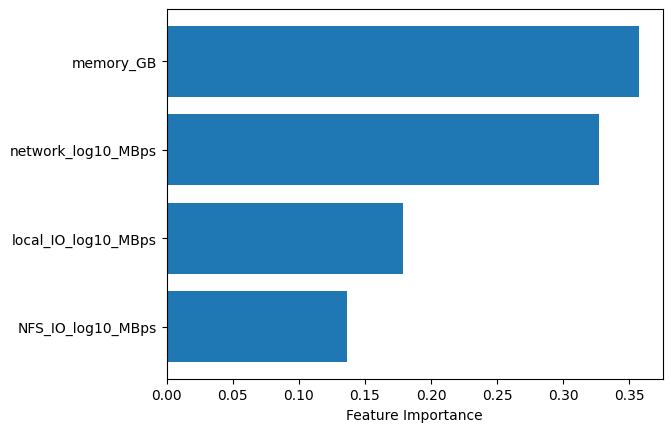

In [ ]:
plt.barh(X_train.columns.values[sort], DT.feature_importances_[sort])
plt.xlabel("Feature Importance")

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
y_train_labels = np.argmax(Y_train, axis=1) # Convert Y_train to a 1D array of class labels
n_classes = len(np.unique(y_train_labels))
print("Number of classes:", n_classes)
X_train_flat = X_train.values.reshape(X_train.shape[0], -1) # Reshape X_train to 2D
clf.fit(X_train_flat, y_train_labels)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1) # Reshape X_test to 2D
predictions = clf.predict(X_test_flat)
if predictions.ndim > 1:
    predictcv = np.argmax(predictions, axis=1)
else:
    predictcv = predictions
actual_valuecv = np.argmax(Y_test, axis=1)
showResults(actual_valuecv, predictcv)
val3 = accuracy_score(actual_valuecv, predictcv) *100
f1svm = f1_score(actual_valuecv, predictcv, average='weighted')

Number of classes: 2
Accuracy  : 0.6604985305322739
Precision : 0.6671831214704268
f1Score : 0.6570631504466489
[[2574 2019]
 [1100 3494]]


In [ ]:
print(X_train.columns.values)

['memory_GB' 'network_log10_MBps' 'local_IO_log10_MBps'
 'NFS_IO_log10_MBps']


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns.values,
    'Importance': clf.coef_[0]
})

In [ ]:
importances = importances.sort_values(by='Importance')

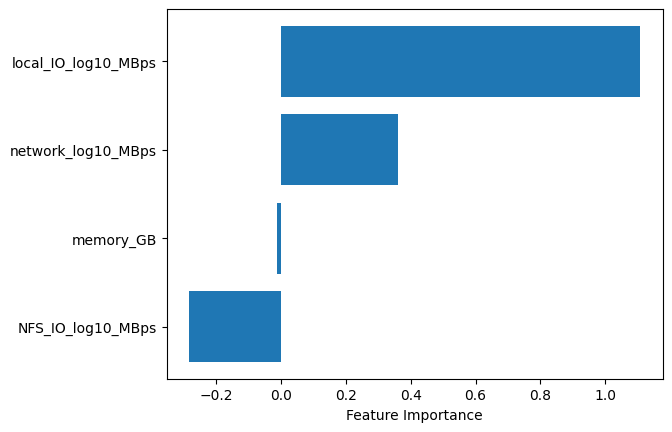

In [ ]:
plt.barh(importances['Attribute'], importances['Importance'])
plt.xlabel("Feature Importance")
plt.show()

#Voting Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = SVC(kernel="linear")
clf2 = RandomForestClassifier(n_estimators=1000, random_state=42)
clf3 = DecisionTreeClassifier(random_state=42, max_depth=20)

eclf1 = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train_flat, y_train_labels)

predictions = eclf1.predict(X_test_flat)
actual_valuecv = np.argmax(Y_test, axis=1)

if predictions.ndim > 1:
    predictcv = np.argmax(predictions, axis=1)
else:
    predictcv = predictions

showResults(actual_valuecv, predictcv)

print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(actual_valuecv, predictcv))
val4 = accuracy_score(actual_valuecv, predictcv) *100
f1vot = f1_score(actual_valuecv, predictcv, average='weighted')


Accuracy  : 0.9096549472080113
Precision : 0.9100919259878083
f1Score : 0.9096306954910774
[[4103  490]
 [ 340 4254]]
*Confusion Matrix for Voting Classifier: 
[[4103  490]
 [ 340 4254]]


In [ ]:
feat_importances = []
for clf in eclf1.estimators_:
    try:
        importances = clf.feature_importances_
    except AttributeError:
        importances = clf.coef_[0]
    feat_importances.append(importances)


In [ ]:
print(feat_importances)

[array([-0.01312106,  0.36151665,  1.12392648, -0.27851565]), array([0.32426548, 0.31488005, 0.2220074 , 0.13884706]), array([0.34908698, 0.32402663, 0.17219164, 0.15469474])]


In [ ]:
avg_feat_importances = np.mean(feat_importances, axis=0)

In [ ]:
for i, importance in enumerate(avg_feat_importances):
    print(f'Feature {i+1}: {importance:.3f}')

Feature 1: 0.220
Feature 2: 0.333
Feature 3: 0.506
Feature 4: 0.005


In [ ]:
sorted=avg_feat_importances.argsort()

Text(0.5, 0, 'Feature Importance')

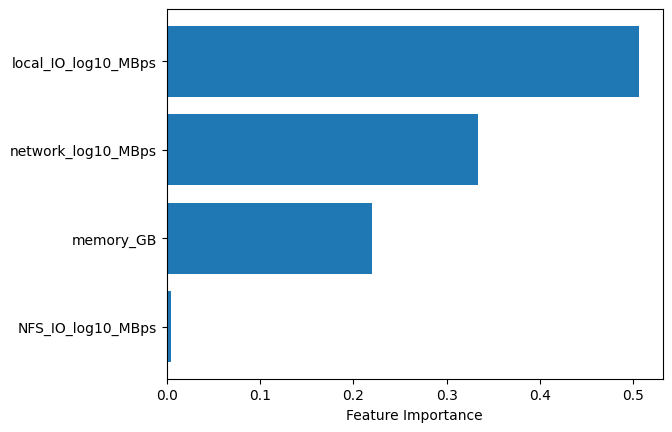

In [ ]:
plt.barh(X_train.columns.values[sorted], avg_feat_importances[sorted])
plt.xlabel("Feature Importance")

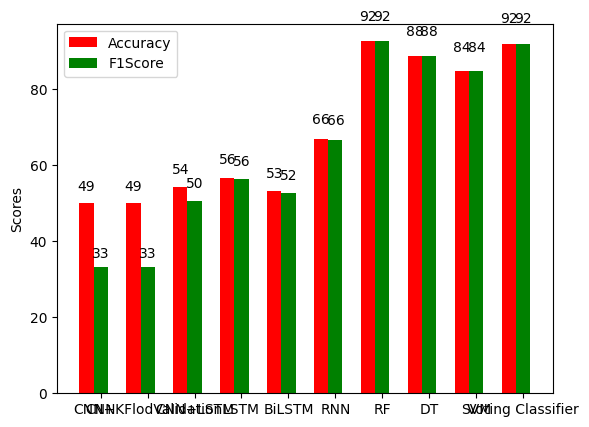

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.3      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [cnn*100,cnnkv*100,hyd*100,lstm*100,bilstm*100,rnn*100,val1,val2,val3,val4]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [f1cnn*100,f1cnnkv*100,f1hyd*100,f1lstm*100,f1bilstm*100,f1rnn*100,f1rf*100,f1dt*100,f1svm*100,f1vot*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('CNN','CNN+KFlodValidation','CNN+LSTM','LSTM','BiLSTM','RNN','RF','DT','SVM','Voting Classifier') )
ax.legend( (rects1[0], rects2[0]), ('Accuracy', 'F1Score') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
score = [cnn*100,cnnkv*100,hyd*100,lstm*100,bilstm*100,rnn*100,val1,val2,val3,val4]
classifier = ('CNN','CNN+KFlodValidation','CNN+LSTM','LSTM','BiLSTM','RNN','RF','DT','SVM','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8 9]
[49.98367258082072, 49.99455752694024, 54.326766082507895, 56.78676390551867, 53.37977577010994, 66.82268422771307, 92.68531620768478, 88.9300097964515, 84.92434962446936, 92.07575922499184]


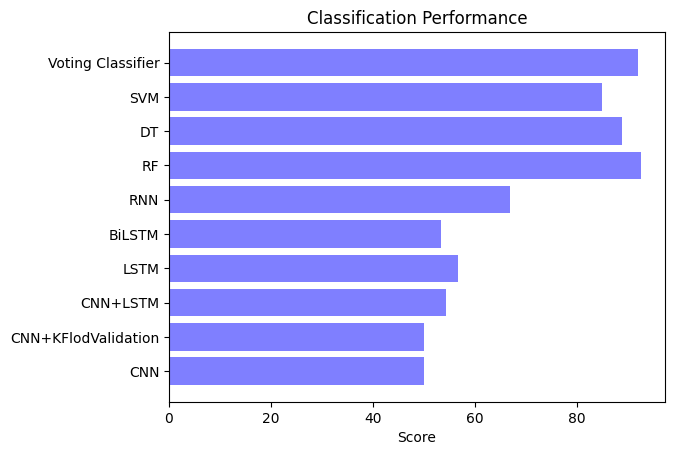

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()